## Feature correlation





Calculate the VIF for numerical features to identify multicollinearity.



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features for VIF calculation
numerical_features = ['year', 'km', 'price']

# Create a new DataFrame with only numerical features
df_numerical = df[numerical_features]

# Convert 'year' column to numeric type
df_numerical['year'] = pd.to_numeric(df_numerical['year'], errors='coerce')

# Drop rows with missing values in 'year' column (if any)
df_numerical.dropna(inplace=True)

# Calculate VIF for each numerical feature
for feature in df_numerical.columns:
    vif = variance_inflation_factor(df_numerical.values, df_numerical.columns.get_loc(feature))
    print(f"VIF for {feature}: {vif}")


VIF for year: 2.3391115862716667
VIF for km: 2.033181239367041
VIF for price: 1.2209606062453453


<ipython-input-17-22339fc57ad2>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-22339fc57ad2>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Given that all VIF values are below 5, there is no severe multicollinearity among the features

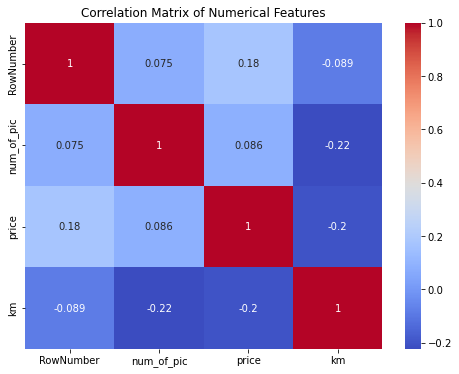

In [ ]:
df_numerical = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Import seaborn for visualization
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



The correlation matrix does not show any signs of multicollinearity